In [231]:
import numpy as np 
import pandas as pd 
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier

from bs4 import BeautifulSoup
import spacy

In [123]:
#pip install tensorflow

In [124]:
#pip install keras

In [232]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout, Dense, GlobalMaxPool1D, Embedding, Activation
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing

In [233]:
data=pd.read_csv('C:/Users/janit/Desktop/IRWA data Set/new.csv')
data.head()

,newsID,Genre,Title,Content_text,Views,language,link
0,1,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...","59,030",eng,NaN
1,2,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,NaN,eng,https://images.gr-assets.com/s/1447303603m/276...
2,3,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,"75,867",eng,NaN
3,4,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,"95,009",en-US,https://images.gr-assets.com/s/1361039443m/418...
4,5,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","72,586",eng,https://images.gr-assets.com/s/1361975680m/265...


In [234]:
for col in data.columns: 
    print(col) 

newsID
Genre
Title
Content_text
Views
language
link


In [235]:
data1=pd.read_csv('C:/Users/janit/Desktop/IRWA data Set/ag_news_genre.csv')
data1.head()

,id,Genre
0,1,World
1,2,Sports
2,3,Business
3,4,Science and Technology


In [236]:
data['summary'] = data['Title'] + ' ' + data['Content_text']

In [237]:
data = data.drop(columns=['Title', 'Content_text'])

In [238]:
label_names=['World','Sports','Business','Science and Tech']

In [239]:
labels = {1:'World', 2:'Sports', 3:'Business', 4:'Science-Tech'}
data['label'] = data['Genre'].map(labels)

In [240]:
data = data.drop(columns=['Genre'])
data = data.drop(columns=['link'])
data = data.drop(columns=['language'])
data = data.drop(columns=['Views'])

In [241]:
data.head()

,newsID,summary,label
0,1,Wall St. Bears Claw Back Into the Black (Reute...,Business
1,2,Carlyle Looks Toward Commercial Aerospace (Reu...,Business
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business
3,4,Iraq Halts Oil Exports from Main Southern Pipe...,Business
4,5,"Oil prices soar to all-time record, posing new...",Business


In [242]:
#pip install seaborn

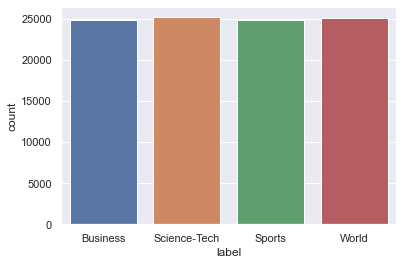

In [243]:
df=data[:100000]
sns.countplot(df.label);

#  1	World
#  2	Sports
#  3	Business
#  4	Science and Technology

In [244]:
# shape of the dataset
print(data.shape)

(99999, 3)


#WordCloud of News Articles of Different Types

# World News

In [138]:
df.shape

(99999, 3)

In [139]:
world = df.summary[df.label[df.label=='World'].index]

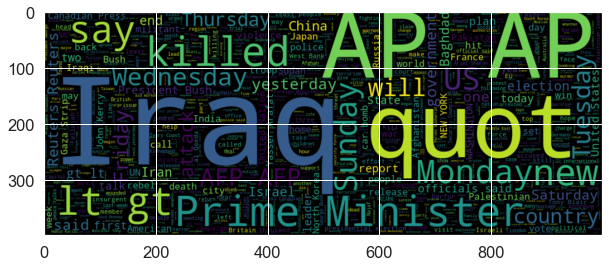

In [140]:
plt.figure(figsize = (10,15));
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1000 , height = 400).generate(" ".join(world))
plt.imshow(wordcloud,interpolation = 'bilinear');

# Sports News

In [141]:
sports = df.summary[df.label[df.label=='Sports'].index]

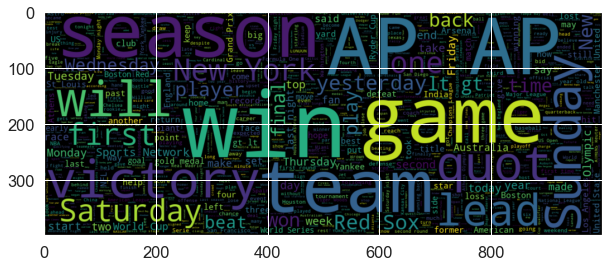

In [142]:
plt.figure(figsize = (10,15)) ;
wordcloud1 = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1000 , height = 400).generate(" ".join(sports))
plt.imshow(wordcloud1,interpolation = 'bilinear');

# Business News

In [143]:
biz = df.summary[df.label[df.label=='Business'].index]

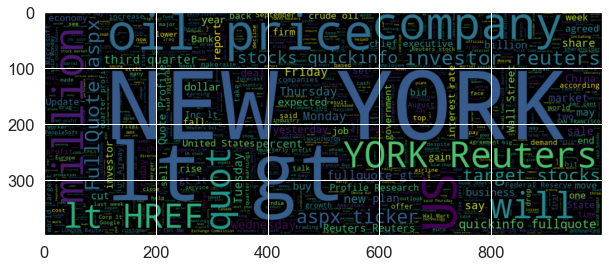

In [144]:
plt.figure(figsize = (10,15));
wordcloud2 = WordCloud(min_font_size = 3, max_words = 2500 , width = 1000 , height = 400).generate(" ".join(biz))
plt.imshow(wordcloud2,interpolation = 'bilinear')

# Science and Technology News

In [145]:
sci = df.summary[df.label[df.label=='Science-Tech'].index]

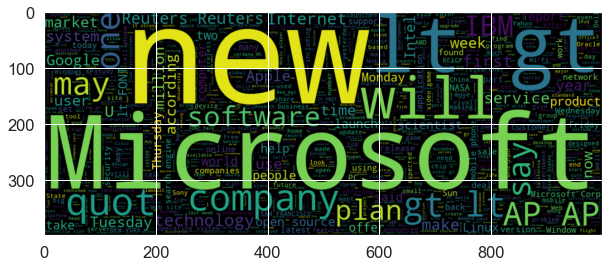

In [146]:
plt.figure(figsize = (10,15));
wordcloud4 = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1000 , height = 400).generate(" ".join(sci))
plt.imshow(wordcloud4,interpolation = 'bilinear');

# Preprocessing of Data


The data is preprocessed, in NLP it is also known as text normalization. 
Some of the most common methods of text normalization are

<!-- Tokenization
     Lemmatization
     Stemming     -->

In [147]:
# train_x=data.summary[:75000]
# test_x=data.summary[75000:]

# train_y=data.label[:75000]
# test_y=data.label[75000:]

# Tokenization of Data

In [148]:
# Tokenization of Data

def tokenization(text):
    lst=text.split()
    return lst

#Apply function on Content tex column
#train_x=train_x.apply(tokenization)
#test_x=test_x.apply(tokenization)

data['summary']=data['summary'].apply(tokenization)

In [149]:
data.head()

,newsID,summary,label
0,1,"[Wall, St., Bears, Claw, Back, Into, the, Blac...",Business
1,2,"[Carlyle, Looks, Toward, Commercial, Aerospace...",Business
2,3,"[Oil, and, Economy, Cloud, Stocks', Outlook, (...",Business
3,4,"[Iraq, Halts, Oil, Exports, from, Main, Southe...",Business
4,5,"[Oil, prices, soar, to, all-time, record,, pos...",Business


# Conversion of Data to Lowercase

In [150]:
# Conversion of Data to Lowercase

def lowercasing(lst):
    new_lst=[]
    for  i in  lst:
        i=i.lower()
        new_lst.append(i) 
    return new_lst

#Apply function on Content tex column
data['summary']=data['summary'].apply(lowercasing)
#train_x=train_x.apply(lowercasing)
#test_x=test_x.apply(lowercasing)



In [151]:
data['summary'].head()
#data.head()

0    [wall, st., bears, claw, back, into, the, blac...
1    [carlyle, looks, toward, commercial, aerospace...
2    [oil, and, economy, cloud, stocks', outlook, (...
3    [iraq, halts, oil, exports, from, main, southe...
4    [oil, prices, soar, to, all-time, record,, pos...
Name: summary, dtype: object

# Removal of Punctuation Symbols

In [152]:
# Removal of Punctuation Symbols

def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for  j in  s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst

#Apply function on Content tex column
data['summary']=data['summary'].apply(remove_punctuations)
#train_x=train_x.apply(remove_punctuations) 
#test_x=test_x.apply(remove_punctuations)


In [153]:
data['summary'].head()
#data.head()

0    [wall, st, bears, claw, back, into, the, black...
1    [carlyle, looks, toward, commercial, aerospace...
2    [oil, and, economy, cloud, stocks, outlook, re...
3    [iraq, halts, oil, exports, from, main, southe...
4    [oil, prices, soar, to, alltime, record, posin...
Name: summary, dtype: object

# Removal of Numbers(digits)

In [154]:
# Removal of Numbers(digits)

def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  s.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst

#Apply function on Content tex column
data['summary']=data['summary'].apply(remove_numbers)
#train_x=train_x.apply(remove_numbers)
#test_x=test_x.apply(remove_numbers)

In [155]:
data['summary'].head()

0    [wall, st, bears, claw, back, into, the, black...
1    [carlyle, looks, toward, commercial, aerospace...
2    [oil, and, economy, cloud, stocks, outlook, re...
3    [iraq, halts, oil, exports, from, main, southe...
4    [oil, prices, soar, to, alltime, record, posin...
Name: summary, dtype: object

# should be removed those Stopwords

In [156]:
#should be removed those Stopwords
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [157]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

#Apply function on Content tex column
data['summary']=data['summary'].apply(remove_stopwords)

#train_x=train_x.apply(remove_stopwords)
#test_x=test_x.apply(remove_stopwords) 

In [158]:
data['summary'].head()

0    [wall, st, bears, claw, back, black, reuters, ...
1    [carlyle, looks, toward, commercial, aerospace...
2    [oil, economy, cloud, stocks, outlook, reuters...
3    [iraq, halts, oil, exports, main, southern, pi...
4    [oil, prices, soar, alltime, record, posing, n...
Name: summary, dtype: object

# Lemmatization of Data

In [159]:
# Lemmatization of Data

lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
#Apply function on Content tex column
data['summary']=data['summary'].apply(lemmatzation)
#train_x=train_x.apply(lemmatzation)
#test_x=test_x.apply(lemmatzation)

In [160]:
data['summary'].head()

0    [wall, st, bear, claw, back, black, reuters, r...
1    [carlyle, look, toward, commercial, aerospace,...
2    [oil, economy, cloud, stock, outlook, reuters,...
3    [iraq, halt, oil, export, main, southern, pipe...
4    [oil, price, soar, alltime, record, posing, ne...
Name: summary, dtype: object

In [161]:
#nltk.download('punkt')

# stemming

In [162]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

In [163]:
from nltk.stem import PorterStemmer
def make_PorterStemmer(e_words):
    stemrwords=[]
    ps =PorterStemmer()
    rootWord = ''
    for w in e_words:
        rootWord=ps.stem(w)
        stemrwords.append(rootWord)
    return stemrwords

data['summary']=data['summary'].apply(make_PorterStemmer)
#train_x=train_x.apply(make_PorterStemmer)
#test_x=test_x.apply(make_PorterStemmer)

In [164]:
data['summary'].head()

0    [wall, st, bear, claw, back, black, reuter, re...
1    [carlyl, look, toward, commerci, aerospac, reu...
2    [oil, economi, cloud, stock, outlook, reuter, ...
3    [iraq, halt, oil, export, main, southern, pipe...
4    [oil, price, soar, alltim, record, pose, new, ...
Name: summary, dtype: object

In [165]:
data.newsID

0            1
1            2
2            3
3            4
4            5
         ...  
99994    99995
99995    99996
99996    99997
99997    99998
99998    99999
Name: newsID, Length: 99999, dtype: int64

In [166]:
data.summary

0        [wall, st, bear, claw, back, black, reuter, re...
1        [carlyl, look, toward, commerci, aerospac, reu...
2        [oil, economi, cloud, stock, outlook, reuter, ...
3        [iraq, halt, oil, export, main, southern, pipe...
4        [oil, price, soar, alltim, record, pose, new, ...
                               ...                        
99994    [ban, yoyo, water, ball, toy, u, group, say, w...
99995    [iran, rule, complet, nuclear, dismantl, beij,...
99996    [three, un, hostag, freed, unharm, afghanistan...
99997    [iraq, meet, press, baghdad, seek, dialogu, sh...
99998    [court, australian, suspect, al, qaeda, sleepe...
Name: summary, Length: 99999, dtype: object

In [167]:
data

,newsID,summary,label
0,1,"[wall, st, bear, claw, back, black, reuter, re...",Business
1,2,"[carlyl, look, toward, commerci, aerospac, reu...",Business
2,3,"[oil, economi, cloud, stock, outlook, reuter, ...",Business
3,4,"[iraq, halt, oil, export, main, southern, pipe...",Business
4,5,"[oil, price, soar, alltim, record, pose, new, ...",Business
...,...,...,...
99994,99995,"[ban, yoyo, water, ball, toy, u, group, say, w...",Business
99995,99996,"[iran, rule, complet, nuclear, dismantl, beij,...",World
99996,99997,"[three, un, hostag, freed, unharm, afghanistan...",World
99997,99998,"[iraq, meet, press, baghdad, seek, dialogu, sh...",World


In [168]:
import pandas as pd
import math as m

def create_Frequency_Term_Document_incidence_matrix(worddict):   
    allbagofwords = []
    noofdoc =0

    tfweight = {}
    dfreq = [] 
    
    for mainlist in worddict.values():
        noofdoc =  noofdoc + 1
        
        for sublist in mainlist:
            if(sublist not in allbagofwords):
                allbagofwords.append(sublist)
       

    doclist = list(worddict.keys())
    #sort the doclist
    doclist.sort()
    #initialize the final dict which needs to return
    finaldict = {}     
    #make a list with all zeros which will later use in the below for loop
    intialwordlist = [0 for i in allbagofwords ]        
    dfreq =  intialwordlist.copy() 
    
    #read each word from the worddict
    for doc,sentence in worddict.items():
        
        #initialize all the terms with '0'        
        finaldict[doc] = intialwordlist.copy()
        tfweight[doc] = intialwordlist.copy()        
        
        temp = sentence
        #update the relavant word count in each doc
        for eachword in sentence:                
            #count of each word in the given row
            countofword =  temp.count(eachword) 
            #if count == 0 when duplicate word removed from temp
            if(countofword == 0 ):                
                continue                
        
            #tf weight of term                 
            tf = 1 + m.log(countofword)             
            
            #get the index of the word which needs to be updates
            indexofword = allbagofwords.index(eachword)
            #update the  count of word all  document
            dfreq[indexofword] =  dfreq[indexofword] +  countofword
            #update the frequency dictioanry
            finaldict[doc][indexofword] =  countofword
            #update the term frequency weight dictionary
            tfweight[doc][indexofword] =  tf
            #remove the duplicate word to optimize the algorithm
            temp =  list(filter((eachword).__ne__, temp))
    
    
    dfweight = {allbagofwords[index]: m.log(dfreq[index]) for index in range(len(dfreq)) }    
    df_frequency = pd.DataFrame.from_dict(finaldict,orient ='index',columns = allbagofwords)  
    df_tfweight = pd.DataFrame.from_dict(tfweight,orient ='index',columns = allbagofwords)  
    df_dfweight =  pd.DataFrame.from_dict(dfweight,orient ='index')  

    return df_frequency,df_tfweight,df_dfweight

In [169]:
car ={}

In [170]:
for i in data.newsID[:10]:
    car[data.newsID[i-1]] = data.summary[i-1]


In [171]:
output = create_Frequency_Term_Document_incidence_matrix(car)

print('==================Term-document count matrices  =============================\n')
print(output[0])
print('\n==================Log-frequency weighting ===================================\n')
print(output[1])
print('\n==================Idf weight For Each Term ==================================\n ')
print(output[2])

==================Term-document count matrices  =============================

    wall  st  bear  claw  back  black  reuter  shortsel  street  \
1      2   1     1     1     1      1       2         1       1   
2      0   0     0     0     0      0       2         0       0   
3      0   0     0     0     0      0       2         0       0   
4      0   0     0     0     0      0       2         0       0   
5      0   0     0     0     0      0       0         0       0   
6      0   0     0     0     0      0       2         0       0   
7      0   0     0     0     0      0       0         0       0   
8      0   0     0     0     1      0       0         0       0   
9      0   0     0     0     0      0       0         0       0   
10     2   1     1     1     1      1       1         1       1   

    dwindlingband  ...  avail  employ  buy  furthest  thing  mind  say  york  \
1               1  ...      0       0    0         0      0     0    0     0   
2               0  ... 

# Term-document count matrices 

In [172]:
output[0]

,wall,st,bear,claw,back,black,reuter,shortsel,street,dwindlingband,...,avail,employ,buy,furthest,thing,mind,say,york,dwindl,band
1,2,1,1,1,1,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0
10,2,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,1,1


# Log-frequency weighting

In [173]:
output[1]

,wall,st,bear,claw,back,black,reuter,shortsel,street,dwindlingband,...,avail,employ,buy,furthest,thing,mind,say,york,dwindl,band
1,1.693147,1.0,1.0,1.0,1.0,1.0,1.693147,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,1.693147,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,1.693147,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,1.693147,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,1.693147,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
10,1.693147,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


# Idf weight For Each Term

In [174]:
output[2]

,0
wall,1.386294
st,0.693147
bear,0.693147
claw,0.693147
back,1.098612
...,...
mind,0.000000
say,0.000000
york,0.000000
dwindl,0.000000


In [175]:
train_x=data.summary[:75000]
test_x=data.summary[75000:]

train_y=data.label[:75000]
test_y=data.label[75000:]

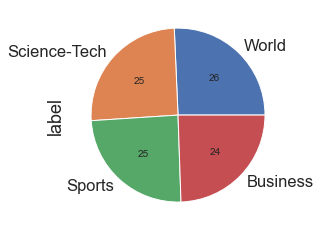

In [176]:
train_y.value_counts().plot(kind='pie',autopct='%1.0f')

#  1	World
#  2	Sports
#  3	Business
#  4	Science and Technology

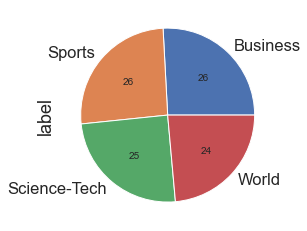

In [177]:
test_y.value_counts().plot(kind='pie',autopct='%1.0f')

In [178]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))

In [179]:
import numpy as np

In [180]:
tfidf=TfidfVectorizer(max_features=10000,min_df=6)
train_1=tfidf.fit_transform(train_x)
test_1=tfidf.transform(test_x)
print("No. of features extracted")
print(len(tfidf.get_feature_names()))
print(tfidf.get_feature_names()[:20])


No. of features extracted
10000
['aa', 'aapl', 'aaron', 'ab', 'ababa', 'abandon', 'abarrel', 'abba', 'abbey', 'abbott', 'abc', 'abdic', 'abduct', 'abductor', 'abdul', 'abdullah', 'abid', 'abil', 'abl', 'ablaz']


In [181]:
train_arr=train_1.toarray()
test_arr=test_1.toarray()

In [182]:
train_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [183]:
test_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from pprint import pprint
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix,accuracy_score
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Training of Model
Model 1- Multinomial Naive Baye

# Multinomial Naive Baye

In [185]:
NB_MN=MultinomialNB()
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)


In [186]:
print("first 20 actual labels")
test_y[:20]          


first 20 actual labels


75000          Sports
75001           World
75002        Business
75003    Science-Tech
75004          Sports
75005           World
75006    Science-Tech
75007    Science-Tech
75008        Business
75009        Business
75010        Business
75011        Business
75012    Science-Tech
75013          Sports
75014           World
75015          Sports
75016        Business
75017    Science-Tech
75018           World
75019           World
Name: label, dtype: object

In [187]:

print("first 20 predicted labels")
print('--------------------------------------')
for i in pred[:20]:
    print(i)

first 20 predicted labels
--------------------------------------
Sports
World
Business
Science-Tech
Sports
World
Science-Tech
Science-Tech
Business
Business
Business
Business
Science-Tech
Sports
World
Sports
Business
Science-Tech
World
World


# Function for evaluation of model

This function finds the F1-score and Accuracy of the trained model

In [188]:
def eval_model(y,y_pred):
    print("F1 score of the model")
    print(f1_score(y,y_pred,average='micro'))
    print("Accuracy of the model")
    print(accuracy_score(y,y_pred))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

# Function for Displaying the Confusion Matrix

This function displays the confusion matrix of the model

In [189]:
def confusion_mat(color):
    cof=confusion_matrix(test_y, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");
    

In [190]:
eval_model(test_y,pred)
    
a=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8998359934397376
Accuracy of the model
0.8998359934397376
Accuracy of the model in percentage
89.984 %


In [191]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

    Business       0.89      0.83      0.86      6461
Science-Tech       0.85      0.89      0.87      6198
      Sports       0.96      0.96      0.96      6447
       World       0.90      0.92      0.91      5893

    accuracy                           0.90     24999
   macro avg       0.90      0.90      0.90     24999
weighted avg       0.90      0.90      0.90     24999



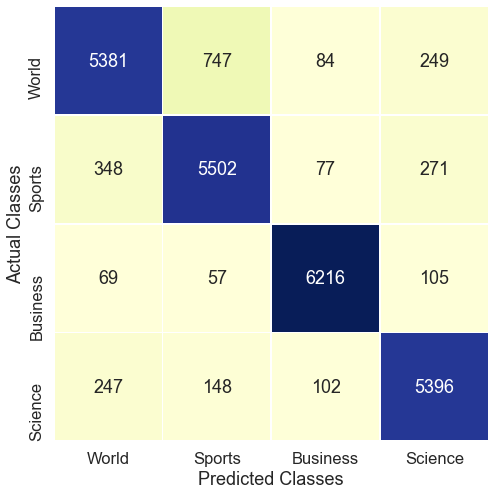

In [192]:
confusion_mat('YlGnBu')

In [193]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)
train_mat = vectorizer.transform(train_x)
print (train_mat.shape)
test_mat = vectorizer.transform(test_x)
print (test_mat.shape)


(75000, 53586)
(24999, 53586)


In [194]:
tfidf = TfidfTransformer()
tfidf.fit(train_mat)
train_tfmat = tfidf.transform(train_mat)
print (train_tfmat.shape)
test_tfmat = tfidf.transform(test_mat)
print (test_tfmat.shape)

(75000, 53586)
(24999, 53586)


# Bernoulli Nave Bayes

In [195]:
train_arr=train_x.tolist()
test_arr=test_x.tolist()
train_lbl = train_y.tolist()
test_lbl = test_y.tolist()

In [196]:
bnb= BernoulliNB()
#fitting
bnb.fit(train_tfmat, train_lbl)
#ypred
ypredBnb = bnb.predict(test_tfmat)
print("F1 score of the model")
print(f1_score(test_lbl,ypredBnb,average='micro'))
print("\n")
print ('Bernoulli Nave Bayes accuracy score')
print (accuracy_score(test_lbl, ypredBnb))
print("\n")
print("Accuracy of the model in percentage")
print(round(accuracy_score(test_lbl,ypredBnb)*100,3),"%")

F1 score of the model
0.8953158126325053


Bernoulli Nave Bayes accuracy score
0.8953158126325053


Accuracy of the model in percentage
89.532 %


In [197]:
print(classification_report(test_lbl,ypredBnb))

              precision    recall  f1-score   support

    Business       0.88      0.82      0.85      6461
Science-Tech       0.84      0.88      0.86      6198
      Sports       0.96      0.96      0.96      6447
       World       0.89      0.91      0.90      5893

    accuracy                           0.90     24999
   macro avg       0.90      0.90      0.89     24999
weighted avg       0.90      0.90      0.90     24999



In [198]:
def confusion_mat1(color):
    cof=confusion_matrix(test_y, ypredBnb)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");


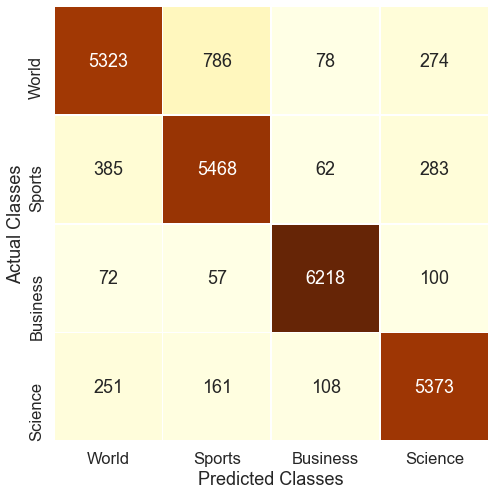

In [199]:
confusion_mat1('YlOrBr')

In [200]:
print("first 20 actual labels")
test_y[10:30]          

first 20 actual labels


75010        Business
75011        Business
75012    Science-Tech
75013          Sports
75014           World
75015          Sports
75016        Business
75017    Science-Tech
75018           World
75019           World
75020           World
75021           World
75022          Sports
75023    Science-Tech
75024    Science-Tech
75025    Science-Tech
75026    Science-Tech
75027    Science-Tech
75028    Science-Tech
75029    Science-Tech
Name: label, dtype: object

In [201]:

print("first 20 predicted labels")
print('--------------------------------------')
for i in ypredBnb[10:30]:
    print(i)

first 20 predicted labels
--------------------------------------
Business
Business
Science-Tech
Sports
World
Sports
Business
Science-Tech
World
World
World
World
Business
Science-Tech
Science-Tech
Science-Tech
Science-Tech
Science-Tech
Science-Tech
Science-Tech


# ================================================================

# SVM

In [202]:
from sklearn.svm import LinearSVC, NuSVC, SVC

# -------------------------------------------------------------------------------------------------------

# Linear SVM

In [203]:
lsvm= LinearSVC()
#fitting
lsvm.fit(train_tfmat, train_lbl)
#ypred
ypredLsvm = lsvm.predict(test_tfmat)
print("F1 score of the model")
print(f1_score(test_lbl,ypredLsvm,average='micro'))
print("\n")
print ('Linear Svm accuracy score')
print (accuracy_score(test_lbl, ypredLsvm))
print("\n")
print("Accuracy of the model in percentage")
print(round(accuracy_score(test_lbl,ypredLsvm)*100,3),"%")

F1 score of the model
0.9000360014400576


Linear Svm accuracy score
0.9000360014400576


Accuracy of the model in percentage
90.004 %


In [204]:
print(classification_report(test_lbl,ypredLsvm))

              precision    recall  f1-score   support

    Business       0.88      0.84      0.86      6461
Science-Tech       0.85      0.89      0.87      6198
      Sports       0.96      0.97      0.96      6447
       World       0.90      0.90      0.90      5893

    accuracy                           0.90     24999
   macro avg       0.90      0.90      0.90     24999
weighted avg       0.90      0.90      0.90     24999



In [205]:
def confusion_mat2(color):
    cof=confusion_matrix(test_y, ypredLsvm)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");


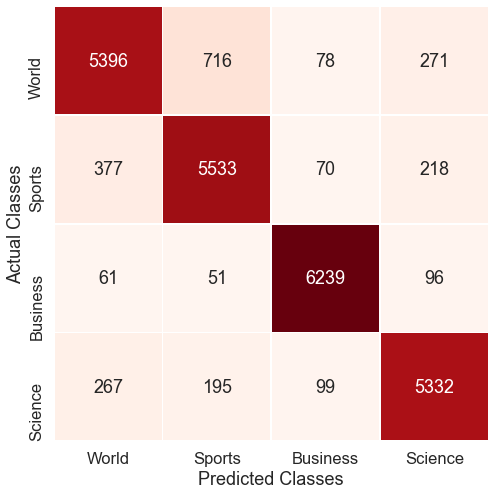

In [206]:
confusion_mat2('Reds')

In [207]:
print("first 20 actual labels")
test_y[50:70]    

first 20 actual labels


75050        Business
75051        Business
75052        Business
75053        Business
75054        Business
75055        Business
75056        Business
75057    Science-Tech
75058    Science-Tech
75059    Science-Tech
75060    Science-Tech
75061          Sports
75062          Sports
75063          Sports
75064          Sports
75065          Sports
75066          Sports
75067           World
75068        Business
75069        Business
Name: label, dtype: object

In [208]:
print("first 20 predicted labels")
print('--------------------------------------')
for i in ypredLsvm[50:70]:
    print(i)

first 20 predicted labels
--------------------------------------
Business
Business
Business
Business
Business
Business
Business
Science-Tech
Science-Tech
Science-Tech
Science-Tech
Sports
Sports
Sports
Sports
Sports
Sports
World
Business
Business


# -----------------------------------------------------------------------------------------------

# non linear svm

In [209]:
# nusvm=NuSVC()
# #fitting
# nusvm.fit(train_tfmat, train_lbl)
# #ypred
# ypredNusvm = nusvm.predict(test_tfmat)
# print("F1 score of the model")
# print(f1_score(test_lbl,ypredNusvm,average='micro'))
# print("\n")
# print ('Non Linear svm accuracy score')
# print (accuracy_score(test_lbl, ypredNusvm))
# print("\n")
# print("Accuracy of the model in percentage")
# print(round(accuracy_score(test_lbl,ypredNusvm)*100,3),"%")

In [210]:
# print(classification_report(test_lbl,ypredNusvm))

In [211]:
# def confusion_mat7(color):
#     cof=confusion_matrix(test_y, ypredLsvm)
#     cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
#     sns.set(font_scale=1.5)
#     plt.figure(figsize=(8,8));

#     sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
#     plt.xlabel("Predicted Classes");
#     plt.ylabel("Actual Classes");

In [212]:
# confusion_mat7('YlGnBu')

In [213]:
# print("first 20 actual labels")
# test_y[50:70] 

In [214]:
# print("first 20 predicted labels")
# print('--------------------------------------')
# for i in ypredNusvm[50:70]:
#     print(i)

# ===============================================================

# KNN

# ------------------------------------------------------------------------------------------------------------

# 1 - Uniform KNN

In [215]:
from sklearn.neighbors import KNeighborsClassifier

In [216]:
knn_uni = KNeighborsClassifier(n_neighbors=5, weights = 'uniform')
#fitting
knn_uni.fit(train_tfmat, train_lbl)
#ypred
ypred_knn_uni = knn_uni.predict(test_tfmat)
print("F1 score of the model")
print(f1_score(test_lbl,ypred_knn_uni,average='micro'))
print("\n")
print ('Distant accuracy score')
print (accuracy_score(test_lbl, ypred_knn_uni))
print("\n")
print("Accuracy of the model in percentage")
print(round(accuracy_score(test_lbl,ypred_knn_uni)*100,3),"%")

F1 score of the model
0.8635545421816873


Distant accuracy score
0.8635545421816873


Accuracy of the model in percentage
86.355 %


In [217]:
print(classification_report(test_lbl,ypred_knn_uni))

              precision    recall  f1-score   support

    Business       0.82      0.81      0.82      6461
Science-Tech       0.82      0.85      0.83      6198
      Sports       0.93      0.93      0.93      6447
       World       0.88      0.87      0.88      5893

    accuracy                           0.86     24999
   macro avg       0.86      0.86      0.86     24999
weighted avg       0.86      0.86      0.86     24999



In [218]:
def confusion_mat4(color):
    cof=confusion_matrix(test_y, ypred_knn_uni)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");


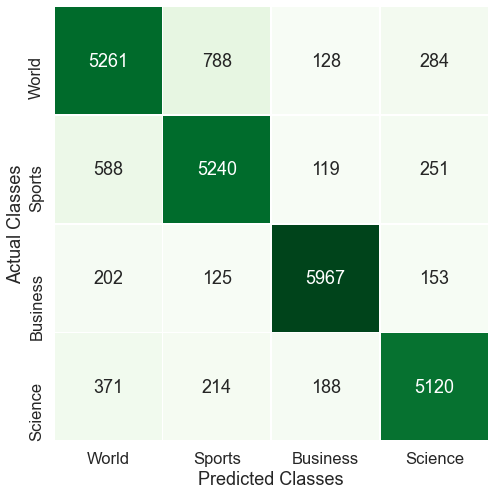

In [219]:
confusion_mat4('Greens')

In [220]:
print("first 20 actual labels")
test_y[5150:5170]   

first 20 actual labels


80150          Sports
80151          Sports
80152          Sports
80153          Sports
80154          Sports
80155           World
80156        Business
80157    Science-Tech
80158    Science-Tech
80159    Science-Tech
80160          Sports
80161          Sports
80162           World
80163        Business
80164        Business
80165        Business
80166        Business
80167    Science-Tech
80168          Sports
80169          Sports
Name: label, dtype: object

In [221]:
print("first 20 predicted labels")
print('--------------------------------------')
for i in ypred_knn_uni[5150:5170]:
    print(i)

first 20 predicted labels
--------------------------------------
Sports
Sports
Sports
Sports
Sports
World
Business
Science-Tech
Science-Tech
Science-Tech
Business
Sports
World
Business
Business
Business
Business
Science-Tech
Sports
Sports


# -------------------------------------------------------------------------------------------------------------

# 2 - Distant KNN

In [222]:
knn_dist = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
#fitting
knn_dist.fit(train_tfmat, train_lbl)
#ypred
ypred_knn_dist = knn_dist.predict(test_tfmat)
print("F1 score of the model")
print(f1_score(test_lbl,ypred_knn_dist,average='micro'))
print("\n")
print ('Distant KNN accuracy score')
print (accuracy_score(test_lbl, ypred_knn_dist))
print("\n")
print("Accuracy of the model in percentage")
print(round(accuracy_score(test_lbl,ypred_knn_dist)*100,3),"%")


F1 score of the model
0.8646745869834792


Distant KNN accuracy score
0.8646745869834793


Accuracy of the model in percentage
86.467 %


In [223]:
print(classification_report(test_lbl,ypred_knn_dist))

              precision    recall  f1-score   support

    Business       0.83      0.80      0.82      6461
Science-Tech       0.83      0.84      0.84      6198
      Sports       0.93      0.93      0.93      6447
       World       0.87      0.88      0.87      5893

    accuracy                           0.86     24999
   macro avg       0.86      0.86      0.86     24999
weighted avg       0.86      0.86      0.86     24999



In [224]:
def confusion_mat5(color):
    cof=confusion_matrix(test_y, ypred_knn_dist)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");


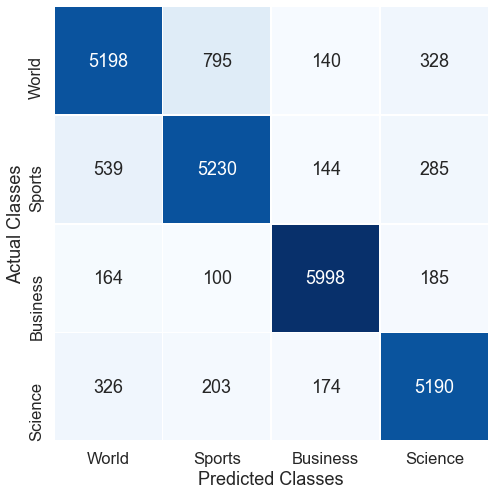

In [225]:
confusion_mat5('Blues')

In [226]:
print("first 20 actual labels")
test_y[7150:7170]  

first 20 actual labels


82150          Sports
82151          Sports
82152          Sports
82153          Sports
82154    Science-Tech
82155           World
82156           World
82157    Science-Tech
82158    Science-Tech
82159    Science-Tech
82160    Science-Tech
82161    Science-Tech
82162    Science-Tech
82163    Science-Tech
82164    Science-Tech
82165    Science-Tech
82166    Science-Tech
82167    Science-Tech
82168    Science-Tech
82169    Science-Tech
Name: label, dtype: object

In [227]:
print("first 20 predicted labels")
print('--------------------------------------')
for i in ypred_knn_uni[7150:7170]:
    print(i)

first 20 predicted labels
--------------------------------------
Sports
Sports
Sports
Sports
Business
World
World
Science-Tech
Science-Tech
Science-Tech
Science-Tech
Science-Tech
Business
Science-Tech
Science-Tech
Science-Tech
Science-Tech
Science-Tech
Science-Tech
Science-Tech


# Comparison of Accuracies of Different Models

In [228]:
Nb1=round(accuracy_score(test_y,pred)*100,3)
Nb2 = round(accuracy_score(test_lbl,ypredLsvm)*100,3)
svm1 = round(accuracy_score(test_lbl,ypredLsvm)*100,3)
knn1 = round(accuracy_score(test_lbl,ypred_knn_uni)*100,3)
kk2= round(accuracy_score(test_lbl,ypred_knn_dist)*100,3)

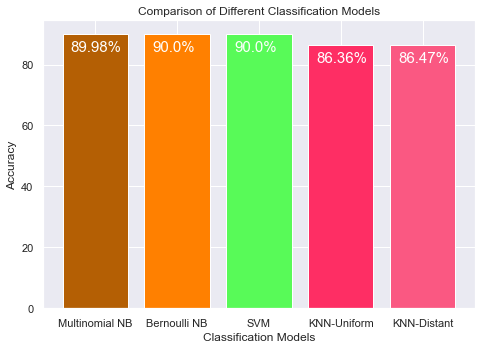

In [229]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['Multinomial NB', 'Bernoulli NB', 'SVM', 'KNN-Uniform','KNN-Distant']
Accuracy=[Nb1,Nb2,svm1,knn1,kk2]
ax.bar(Models,Accuracy,color=['#B45F04','#FF8000','#58FA58','#FE2E64','#FA5882']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();